**Load the collected data**

Mount the Google Drive to the colaboratory 

In [1]:
from google.colab import drive 
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


Import pandas library

In [0]:
import pandas as pd

Read the CSV file 

In [3]:
df = pd.read_csv('/content/drive/My Drive/Reddit Flare Detector/data.csv')
df.head(2) #print top 2 rows of the dataframe

,Unnamed: 0,id,title,url,score,created_at,body,author,nups,ncomments,comments,flair
0,0,fwjdqr,4 days ago we had pending orders of 100 millio...,https://www.reddit.com/r/india/comments/fwjdqr...,91,1.586290e+09,> We are getting frantic calls from our pharma...,india_ko_vanakkam,91,5,"Modi has Stockholm syndromeTo be fair, the evi...",AskIndia
1,1,fizkkk,Randians who were big time users of dating app...,https://www.reddit.com/r/india/comments/fizkkk...,20,1.584298e+09,I'd my own stint with these apps(a couple of m...,__knockknockturnal__,20,19,Someone matched with me just to tell me that I...,AskIndia


Delete the redundant column `Unnamed: 0` from the dataframe

In [4]:
del df['Unnamed: 0']
df.head() #print the top 5 rows 

,id,title,url,score,created_at,body,author,nups,ncomments,comments,flair
0,fwjdqr,4 days ago we had pending orders of 100 millio...,https://www.reddit.com/r/india/comments/fwjdqr...,91,1.586290e+09,> We are getting frantic calls from our pharma...,india_ko_vanakkam,91,5,"Modi has Stockholm syndromeTo be fair, the evi...",AskIndia
1,fizkkk,Randians who were big time users of dating app...,https://www.reddit.com/r/india/comments/fizkkk...,20,1.584298e+09,I'd my own stint with these apps(a couple of m...,__knockknockturnal__,20,19,Someone matched with me just to tell me that I...,AskIndia
2,f25vx0,What does r/India thinks about the Flat Earthers?,https://www.reddit.com/r/india/comments/f25vx0...,5,1.581441e+09,"I encountered a Foreigner in IG who says "" Rou...",Dev1003,5,31,I haven't found a Indian yet who believes eart...,AskIndia
3,dtvliq,People who left their 9 to 5 jobs to pursue a ...,https://www.reddit.com/r/india/comments/dtvliq...,46,1.573333e+09,Couldn't add AskIndia flair from the mobile br...,c0mrade34,46,36,"An Engineer, doing advertisement shoots since ...",AskIndia
4,1s57oi,Need feedback for Insurance Policy that I took...,https://www.reddit.com/r/india/comments/1s57oi...,1,1.386254e+09,**Re-posting here because of lack of activity ...,dhavalcoholic,1,1,"Dear Policy Holder(Dhavalcoholic),\n \nWe requ...",AskIndia


Import matplotlib and seaborn library: It is used to plot graphs 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Class distribution**

Text(0, 0.5, 'samples')

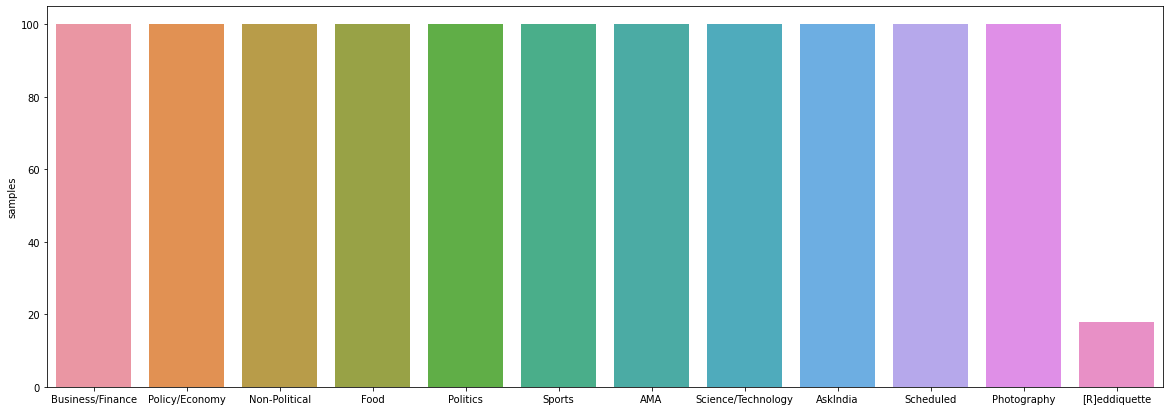

In [6]:
x = df.flair.value_counts()

plt.figure(figsize=(20,7))
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

Flares like `AskIndia`, `Scheduled`, `Photography`, `Food`, `Business/Finance`, `Politics`, `Non-Political`, `AMA`, `Policy/Economics`, `Science/Technology`, `Sports` have 100 posts each in the dataframe.   

Whereas, `[R]eddiquette` flare has only 18 posts in the dataframe. 

**describe()** shows the descriptive statistics of the dataframe.  

In [7]:
df.describe() # shows the descriptive statistics of the columns with numeric datatype

,score,created_at,nups,ncomments
count,1118.000000,1.118000e+03,1118.000000,1118.000000
mean,177.392665,1.549094e+09,177.392665,40.553667
std,746.230096,5.231922e+07,746.230096,80.657838
min,0.000000,1.306251e+09,0.000000,0.000000
25%,9.000000,1.536047e+09,9.000000,3.000000
50%,28.000000,1.572184e+09,28.000000,11.000000
75%,117.000000,1.583668e+09,117.000000,39.750000
max,17881.000000,1.587521e+09,17881.000000,497.000000


**Missing values in the dataframe**

Plot the missing values 

,Total,Percent
body,443,0.396243
comments,97,0.086762
flair,0,0.000000
ncomments,0,0.000000
nups,0,0.000000


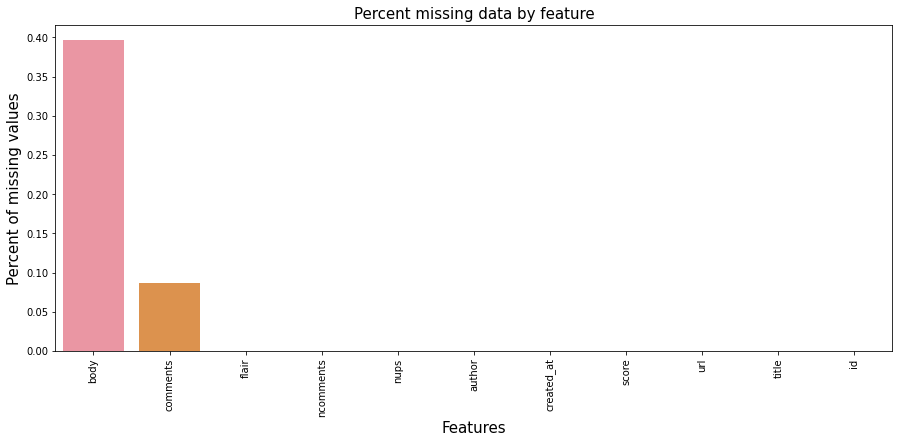

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

missing_data.head()

**Handle the missing values**

Import numpy library

In [0]:
import numpy as np

Replace all the `NaN` with empty string 

In [0]:
df = df.replace(np.nan, '', regex=True)

## Basic Pre-processing

Remove redundant features like `id`, `url`, `created_at` and `author` as they contain no useful information. 

In [11]:
del df['id']
del df['url']
del df['created_at']
del df['author']
df.head(2)

,title,score,body,nups,ncomments,comments,flair
0,4 days ago we had pending orders of 100 millio...,91,> We are getting frantic calls from our pharma...,91,5,"Modi has Stockholm syndromeTo be fair, the evi...",AskIndia
1,Randians who were big time users of dating app...,20,I'd my own stint with these apps(a couple of m...,20,19,Someone matched with me just to tell me that I...,AskIndia


**Lower case**: transform texts into lowercase to avoid the multiple copies of the same word in the future. 

In [12]:
df['body'] = df['body'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['title'] = df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['comments'] = df['comments'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df.head(2)

,title,score,body,nups,ncomments,comments,flair
0,4 days ago we had pending orders of 100 millio...,91,> we are getting frantic calls from our pharma...,91,5,"modi has stockholm syndrometo be fair, the evi...",AskIndia
1,randians who were big time users of dating app...,20,i'd my own stint with these apps(a couple of m...,20,19,someone matched with me just to tell me that i...,AskIndia


**Remove Punctuation**: Removal of all punctuations leads to the reduction in the size of the features set.

In [13]:
#df['body'] = df['body'].str.replace('[^\w\s]','')
#df['title'] = df['title'].str.replace('[^\w\s]','')
#df['comments'] = df['comments'].str.replace('[^\w\s]','')

df.head(2)

,title,score,body,nups,ncomments,comments,flair
0,4 days ago we had pending orders of 100 millio...,91,> we are getting frantic calls from our pharma...,91,5,"modi has stockholm syndrometo be fair, the evi...",AskIndia
1,randians who were big time users of dating app...,20,i'd my own stint with these apps(a couple of m...,20,19,someone matched with me just to tell me that i...,AskIndia


**Remove Stopwords**: Commonly occuring words should be removed as they do not add much value to the meaning of the document.  

Import NLTK library to remove all the stopwords

In [14]:
import nltk 
nltk.download('stopwords') #download stopwords
from nltk.corpus import stopwords #import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Split the string by whitespaces and transform it into a list. Check if the words in the list are in the `stop` instance. If not, join them with white spaces and update the string. 

In [15]:
stop = stopwords.words('english') # define the stopword instance

df['body'] = df['body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['title'] = df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['comments'] = df['comments'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df.head(2)

,title,score,body,nups,ncomments,comments,flair
0,4 days ago pending orders 100 million hydroxyc...,91,> getting frantic calls pharma customers delay...,91,5,"modi stockholm syndrometo fair, evidence chlor...",AskIndia
1,randians big time users dating apps like tinde...,20,i'd stint apps(a couple months) one point feel...,20,19,"someone matched tell i'm fat.cat 1:- general ""...",AskIndia


**Remove common occuring words with respect to our data**

In [16]:
#freq_title = pd.Series(' '.join(df['title']).split()).value_counts()[:10] # find out the top 10 occuring words 
#freq_title = list(freq_title.index)

#freq_body = pd.Series(' '.join(df['body']).split()).value_counts()[:10]
#freq_body = list(freq_body.index)

#freq_comments = pd.Series(' '.join(df['comments']).split()).value_counts()[:10]
#freq_comments = list(freq_comments.index)

#df['body'] = df['body'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_body)) 
#df['title'] = df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_title))
#df['comments'] = df['comments'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_comments))

df.head(2)

,title,score,body,nups,ncomments,comments,flair
0,4 days ago pending orders 100 million hydroxyc...,91,> getting frantic calls pharma customers delay...,91,5,"modi stockholm syndrometo fair, evidence chlor...",AskIndia
1,randians big time users dating apps like tinde...,20,i'd stint apps(a couple months) one point feel...,20,19,"someone matched tell i'm fat.cat 1:- general ""...",AskIndia


**Spelling correction**: It is a necessary step because it will help in understanding the semantics of the text better.  

To achieve this, use the ```textblob``` library.

In [17]:
from textblob import TextBlob
#df['title'] = df['title'].apply(lambda x: str(TextBlob(x).correct()))
#df['body'] = df['body'].apply(lambda x: str(TextBlob(x).correct()))
#df['comments'] = df['comments'].apply(lambda x: str(TextBlob(x).correct()))

df.head(2)

,title,score,body,nups,ncomments,comments,flair
0,4 days ago pending orders 100 million hydroxyc...,91,> getting frantic calls pharma customers delay...,91,5,"modi stockholm syndrometo fair, evidence chlor...",AskIndia
1,randians big time users dating apps like tinde...,20,i'd stint apps(a couple months) one point feel...,20,19,"someone matched tell i'm fat.cat 1:- general ""...",AskIndia


**Lemmatization**: It is used to convert the word into it's root word

In [18]:
nltk.download('wordnet')
from textblob import Word

df['body'] = df['body'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['title'] = df['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['comments'] = df['comments'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.head(2)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,score,body,nups,ncomments,comments,flair
0,4 day ago pending order 100 million hydroxychl...,91,> getting frantic call pharma customer delayed...,91,5,"modi stockholm syndrometo fair, evidence chlor...",AskIndia
1,randians big time user dating apps like tinder...,20,i'd stint apps(a couple months) one point feel...,20,19,"someone matched tell i'm fat.cat 1:- general ""...",AskIndia


**Note:** In this dataset, removal of punctuations and common occurring words with respect to data leads to decrease in the model accuracy by almost 10%. 

# Exploratory Data Analysis (EDA) 

**Title Length**

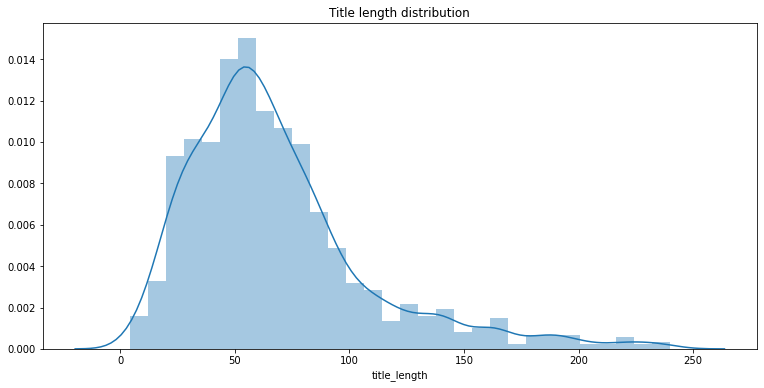

In [19]:
df['title_length'] = df['title'].str.len()

plt.figure(figsize=(12.8,6))
sns.distplot(df['title_length']).set_title('Title length distribution');

In the dataframe, the length of the title majorly lies between 25 - 75 words. 

**Length distribution in `body` feature**

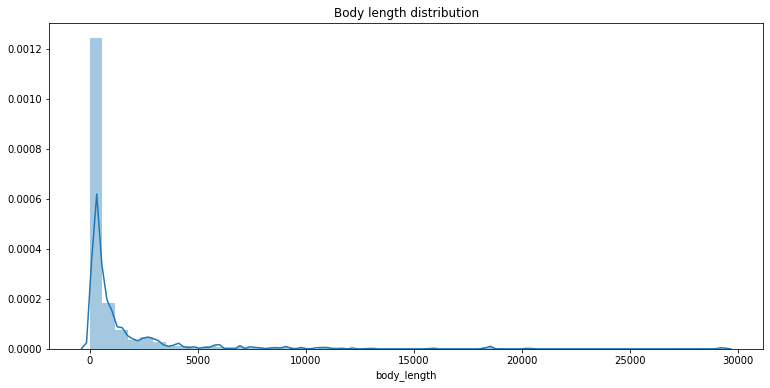

In [20]:
df['body_length'] = df['body'].str.len()

plt.figure(figsize=(12.8,6))
sns.distplot(df['body_length']).set_title('Body length distribution');

This graph signifies that the length of the most of the words in `body` feature lies between 0 to 500 words.  

**Length distribution in `comments` feature**

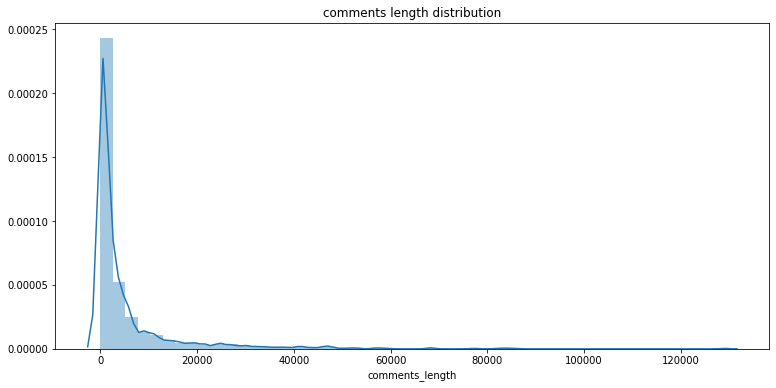

In [21]:
df['comments_length'] = df['comments'].str.len()

plt.figure(figsize=(12.8,6))
sns.distplot(df['comments_length']).set_title('comments length distribution');

This graph signifies that length of the most of the words lies between 0 to 5000

**Tokenizer:** convert the text into an array of words

In [0]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df["title_tokens"] = df["title"].apply(tokenizer.tokenize)
df["body_tokens"] = df["body"].apply(tokenizer.tokenize)
df["comments_tokens"] = df["comments"].apply(tokenizer.tokenize)


**Explore words and sentences using tokenizer**

Make arrays containing all the words with respect to the features in the dataframe.

In [0]:
title_all_words = [word for tokens in df["title_tokens"] for word in tokens]
body_all_words = [word for tokens in df["body_tokens"] for word in tokens]
comments_all_words = [word for tokens in df["comments_tokens"] for word in tokens]

Store the words with their frequency in a dictionary

In [0]:
from collections import Counter

title_count_all_words = Counter(title_all_words)
body_count_all_words = Counter(body_all_words)
comments_count_all_words = Counter(comments_all_words)

Import wordcloud

In [0]:
from wordcloud import WordCloud

Generate a wordcloud for all the words in `title` feature

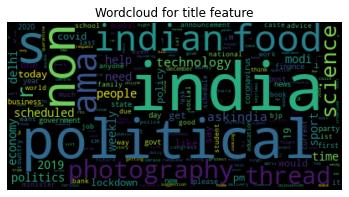

In [26]:
wc = WordCloud().generate_from_frequencies(title_count_all_words)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Wordcloud for title feature')
plt.show()

Words like `political`, `india`, `ama` are used the most in the `title` feature

Generate a wordcloud for all the words in `body` feature

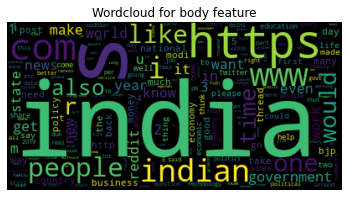

In [27]:
wc = WordCloud().generate_from_frequencies(body_count_all_words)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Wordcloud for body feature')
plt.show()

Words like `india`, `indian`, `https` are most used words in the `body` feature. 

Generate a wordcloud for all the words in `comments` feature

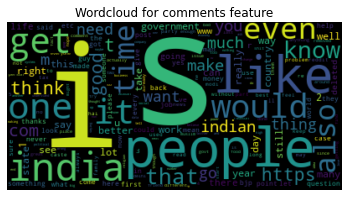

In [28]:
wc = WordCloud().generate_from_frequencies(comments_count_all_words)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Wordcloud for comments feature')
plt.show()

Words like `india` are the most used words that appears in all the three features: `title`, `body` and `comment. `

## Advance text processing

**N-grams** are the combination of multiple words used together. They capture the language structure, like what letter or word is likely to follow the given one.

In [0]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

**Extract Bigrams**

Function to return the frequency of the sequence of two words from a string of tokens i.e., corpus. 

In [0]:
def get_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

Plot top 10 bigrams used in the `comments` feature 

Text(0.5, 1.0, 'Top 10 bigrams used in the comments')

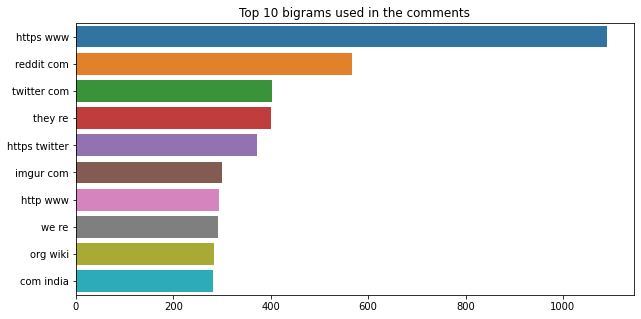

In [31]:
plt.figure(figsize=(10,5))
top_bigrams=get_bigrams(df['comments'])[:10]
x,y=map(list,zip(*top_bigrams))
ax = sns.barplot(x=y,y=x)
ax.set_title("Top 10 bigrams used in the comments")

`https wwww` is the two-words sequence that appears most in the `comments` feature. 

Plot top 10 bigrams used in the `title` feature of the reddit posts. 

Text(0.5, 1.0, 'Top 10 bigrams used in the title')

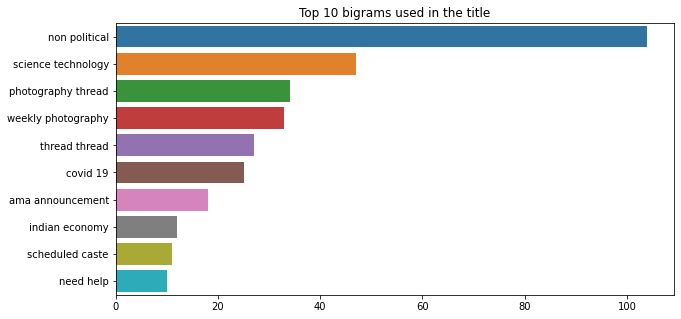

In [32]:
plt.figure(figsize=(10,5))
top_bigrams=get_bigrams(df['title'])[:10]
x,y=map(list,zip(*top_bigrams))
ax = sns.barplot(x=y,y=x)
ax.set_title("Top 10 bigrams used in the title")

`non political` is the two-words sequence that appears most in the `title` feature. 

Plot top 10 bigrams used in the `body` feature 



Text(0.5, 1.0, 'Top 10 bigrams used in the body')

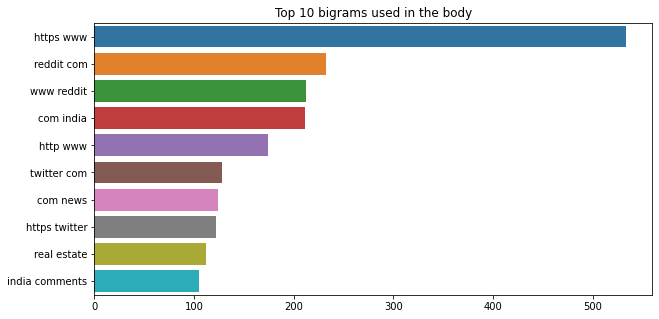

In [33]:
plt.figure(figsize=(10,5))
top_bigrams=get_bigrams(df['body'])[:10]
x,y=map(list,zip(*top_bigrams))
ax = sns.barplot(x=y,y=x)
ax.set_title("Top 10 bigrams used in the body")

`https wwww` is the two-words sequence that appears most in the `body` feature. 

## Readability 

Distributions of meta features in classes and datasets can be helpful to identify reddit flare. The meta features used for the analysis are;

- ```word_count``` number of words in text
- ```unique_word_count``` number of unique words in text
- ```stop_word_count``` number of stop words in text
- ```url_count number``` of urls in text
- ```mean_word_length``` average character count in words
- ```char_count number``` of characters in text
- ```hashtag_count``` number of hashtags in text
- ```numeric_count``` number of numerics in text
- ```uppercase_count``` number of uppercase words in text

Import re, STOPWORDS 

In [0]:
import re
import nltk
from wordcloud import STOPWORDS
import numpy as np

Extract the features of the title, body and comments. 

In [35]:
# word_count
df['title_word_count'] = df['title'].apply(lambda x: len(str(x).split()))
df['body_word_count'] = df['body'].apply(lambda x: len(str(x).split()))
df['comments_word_count'] = df['comments'].apply(lambda x: len(str(x).split()))

# unique_word_count
df['title_unique_word_count'] = df['title'].apply(lambda x: len(set(str(x).split())))
df['body_unique_word_count'] = df['body'].apply(lambda x: len(set(str(x).split())))
df['comments_unique_word_count'] = df['comments'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df['title_stop_word_count'] = df['title'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df['body_stop_word_count'] = df['body'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df['comments_stop_word_count'] = df['comments'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
df['title_url_count'] = df['title'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df['body_url_count'] = df['body'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df['comments_url_count'] = df['comments'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df['title_mean_word_length'] = df['title'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df['body_mean_word_length'] = df['body'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df['comments_mean_word_length'] = df['comments'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df['title_char_count'] = df['title'].apply(lambda x: len(str(x)))
df['body_char_count'] = df['body'].apply(lambda x: len(str(x)))
df['comments_char_count'] = df['comments'].apply(lambda x: len(str(x)))

#hashtag_count
df['title_hashtag_count'] = df['title'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df['body_hashtag_count'] = df['body'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df['comments_hashtag_count'] = df['comments'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

#numeric_count
df['title_numeric_count'] = df['title'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['body_numeric_count'] = df['body'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df['comments_numeric_count'] = df['comments'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

#uppercase_count
df['title_uppercase_count'] = df['title'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['body_uppercase_count'] = df['body'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df['comments_uppercase_count'] = df['comments'].apply(lambda x: len([x for x in x.split() if x.isupper()]))



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Print top 2 rows of the dataframe

In [36]:
df.head(2)

,title,score,body,nups,ncomments,comments,flair,title_length,body_length,comments_length,title_tokens,body_tokens,comments_tokens,title_word_count,body_word_count,comments_word_count,title_unique_word_count,body_unique_word_count,comments_unique_word_count,title_stop_word_count,body_stop_word_count,comments_stop_word_count,title_url_count,body_url_count,comments_url_count,title_mean_word_length,body_mean_word_length,comments_mean_word_length,title_char_count,body_char_count,comments_char_count,title_hashtag_count,body_hashtag_count,comments_hashtag_count,title_numeric_count,body_numeric_count,comments_numeric_count,title_uppercase_count,body_uppercase_count,comments_uppercase_count
0,4 day ago pending order 100 million hydroxychl...,91,> getting frantic call pharma customer delayed...,91,5,"modi stockholm syndrometo fair, evidence chlor...",AskIndia,134,1601,497,"[4, day, ago, pending, order, 100, million, hy...","[getting, frantic, call, pharma, customer, del...","[modi, stockholm, syndrometo, fair, evidence, ...",19,169,68,18,150,64,0,1,1,0,4,0,6.105263,8.479290,6.323529,134,1601,497,0,3,0,2,2,0,0,0,0
1,randians big time user dating apps like tinder...,20,i'd stint apps(a couple months) one point feel...,20,19,"someone matched tell i'm fat.cat 1:- general ""...",AskIndia,82,110,2030,"[randians, big, time, user, dating, apps, like...","[i, d, stint, apps, a, couple, months, one, po...","[someone, matched, tell, i, m, fat, cat, 1, ge...",14,18,314,14,18,229,1,2,8,0,0,0,4.928571,5.166667,5.468153,82,110,2030,0,0,0,0,0,3,0,0,0


**Create some other features**

In [37]:
df['title_body'] = df['title'] + df['body']
df['body_comments'] = df['body'] + df['comments']
df['title_comments'] = df['title'] + df['comments']
df['title_body_comments'] = df['title'] + df['body'] + df['comments']
df.head(2)

,title,score,body,nups,ncomments,comments,flair,title_length,body_length,comments_length,title_tokens,body_tokens,comments_tokens,title_word_count,body_word_count,comments_word_count,title_unique_word_count,body_unique_word_count,comments_unique_word_count,title_stop_word_count,body_stop_word_count,comments_stop_word_count,title_url_count,body_url_count,comments_url_count,title_mean_word_length,body_mean_word_length,comments_mean_word_length,title_char_count,body_char_count,comments_char_count,title_hashtag_count,body_hashtag_count,comments_hashtag_count,title_numeric_count,body_numeric_count,comments_numeric_count,title_uppercase_count,body_uppercase_count,comments_uppercase_count,title_body,body_comments,title_comments,title_body_comments
0,4 day ago pending order 100 million hydroxychl...,91,> getting frantic call pharma customer delayed...,91,5,"modi stockholm syndrometo fair, evidence chlor...",AskIndia,134,1601,497,"[4, day, ago, pending, order, 100, million, hy...","[getting, frantic, call, pharma, customer, del...","[modi, stockholm, syndrometo, fair, evidence, ...",19,169,68,18,150,64,0,1,1,0,4,0,6.105263,8.479290,6.323529,134,1601,497,0,3,0,2,2,0,0,0,0,4 day ago pending order 100 million hydroxychl...,> getting frantic call pharma customer delayed...,4 day ago pending order 100 million hydroxychl...,4 day ago pending order 100 million hydroxychl...
1,randians big time user dating apps like tinder...,20,i'd stint apps(a couple months) one point feel...,20,19,"someone matched tell i'm fat.cat 1:- general ""...",AskIndia,82,110,2030,"[randians, big, time, user, dating, apps, like...","[i, d, stint, apps, a, couple, months, one, po...","[someone, matched, tell, i, m, fat, cat, 1, ge...",14,18,314,14,18,229,1,2,8,0,0,0,4.928571,5.166667,5.468153,82,110,2030,0,0,0,0,0,3,0,0,0,randians big time user dating apps like tinder...,i'd stint apps(a couple months) one point feel...,randians big time user dating apps like tinder...,randians big time user dating apps like tinder...


Shape of the dataframe

In [38]:
df.shape

(1118, 44)

### **Split the dataframe into train and test sets.**

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df['flair'], test_size=0.3, random_state=42)

## Feature Engineering

Since machines can't understand raw text data to predict the `flares`. Thus, we used two type of vectorizer to convert the text data into numeric data. These vectorizers are:
* CountVectorizer
* TFIDF Vectorizer

## **1. Count Vectorizer**

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

**Note**: Here I've used `max_features = 100000` so that the vectorizer can pick the top 100,1000 features to fit the train data. 

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

cv_title = CountVectorizer(lowercase=True, analyzer='word', min_df= 10 ,stop_words= 'english',ngram_range=(1,2))
cv_body = CountVectorizer(lowercase=True, analyzer='word', min_df= 10, stop_words= 'english',ngram_range=(1,2))
cv_comments = CountVectorizer(lowercase=True, analyzer='word', min_df= 10, stop_words= 'english',ngram_range=(1,2))

cv_title_body = CountVectorizer(lowercase=True, analyzer='word', min_df= 10, max_features = 100000, stop_words= 'english',ngram_range=(1,2))
cv_body_comments = CountVectorizer(lowercase=True, analyzer='word', min_df= 10, max_features = 100000, stop_words= 'english',ngram_range=(1,2))
cv_title_comments = CountVectorizer(lowercase=True, analyzer='word', min_df= 10, max_features = 100000, stop_words= 'english',ngram_range=(1,2))

cv_title_body_comments = CountVectorizer(lowercase=True, analyzer='word', min_df= 10, max_features = 100000, stop_words= 'english',ngram_range=(1,2))


X_train_title = cv_title.fit_transform(X_train['title'])
X_test_title = cv_title.transform(X_test['title'])

X_train_body = cv_body.fit_transform(X_train['body'])
X_test_body = cv_body.transform(X_test['body'])

X_train_comments = cv_comments.fit_transform(X_train['comments'])
X_test_comments = cv_comments.transform(X_test['comments'])

X_train_title_body = cv_title_body.fit_transform(X_train['title_body'])
X_test_title_body = cv_title_body.transform(X_test['title_body'])

X_train_body_comments = cv_body_comments.fit_transform(X_train['body_comments'])
X_test_body_comments = cv_body_comments.transform(X_test['body_comments'])

X_train_title_comments = cv_title_comments.fit_transform(X_train['title_comments'])
X_test_title_comments = cv_title_comments.transform(X_test['title_comments'])

X_train_title_body_comments = cv_title_body_comments.fit_transform(X_train['title_body_comments'])
X_test_title_body_comments = cv_title_body_comments.transform(X_test['title_body_comments'])

In [41]:
print("TITLE")
print("Shape of the train set: ", X_train_title.shape)
print("Shape of the test set: ", X_test_title.shape)
print()
print("BODY")
print("Shape of the train set: ", X_train_body.shape)
print("Shape of the test set: ", X_test_body.shape)
print()
print("COMMENTS")
print("Shape of the train set: ", X_train_comments.shape)
print("Shape of the test set: ", X_test_comments.shape)
print()
print("TITLE + BODY + COMMENTS")
print("Shape of the train set: ", X_train_title_body_comments.shape)
print("Shape of the test set: ", X_test_title_body_comments.shape)


TITLE
Shape of the train set:  (782, 69)
Shape of the test set:  (336, 69)

BODY
Shape of the train set:  (782, 1294)
Shape of the test set:  (336, 1294)

COMMENTS
Shape of the train set:  (782, 5714)
Shape of the test set:  (336, 5714)

TITLE + BODY + COMMENTS
Shape of the train set:  (782, 6703)
Shape of the test set:  (336, 6703)


# Model 

In [0]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

Function to calculate the `accuracy`, `precision`, `recall` and `f1-score`

In [0]:
def get_metrics(y_test, y_predicted):  
    
    # precision = (true positives / (true positives+false positives))
    precision = precision_score(y_test, y_predicted, pos_label=None, average='weighted')             
    
    # recall = (true positives / (true positives + false negatives))
    recall = recall_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    
    return accuracy, precision, recall, f1

**Define the ML models**

In [0]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)

In [0]:
from sklearn import svm

svm_classifier = svm.LinearSVC()

In [0]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

In [0]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)

In [0]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [0]:
from xgboost.sklearn import XGBClassifier

xgboost_classifier = XGBClassifier(max_depth=7, n_estimators=1000)

**Let's train the ML models on the `CountVectorizer` features** 

**Train the models on the `title` feature**

1. Logistic Regression 

In [50]:
lr_classifier.fit(X_train_title, y_train)

y_predict_title_lr = lr_classifier.predict(X_test_title)

accuracy_title_lr, precision_title_lr, recall_title_lr, f1_title_lr = get_metrics(y_test, y_predict_title_lr)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_title_lr, precision_title_lr, recall_title_lr, f1_title_lr))

accuracy = 0.610, precision = 0.748, recall = 0.610, f1 = 0.658


2. Support Vector Machine (SVM)

In [51]:
svm_classifier.fit(X_train_title, y_train)

y_predict_title_svm = svm_classifier.predict(X_test_title)

accuracy_title_svm, precision_title_svm, recall_title_svm, f1_title_svm = get_metrics(y_test, y_predict_title_svm)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_title_svm, precision_title_svm, recall_title_svm, f1_title_svm))

accuracy = 0.682, precision = 0.740, recall = 0.682, f1 = 0.689


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Naive Bayes Classifier

In [52]:
nb_classifier.fit(X_train_title, y_train)

y_predict_title_nb = nb_classifier.predict(X_test_title)

accuracy_title_nb, precision_title_nb, recall_title_nb, f1_title_nb = get_metrics(y_test, y_predict_title_nb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_title_nb, precision_title_nb, recall_title_nb, f1_title_nb))

accuracy = 0.643, precision = 0.719, recall = 0.643, f1 = 0.646


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. Decision Tree Classifier

In [53]:
dt_classifier.fit(X_train_title, y_train)

y_predict_title_dt = dt_classifier.predict(X_test_title)

accuracy_title_dt, precision_title_dt, recall_title_dt, f1_title_dt = get_metrics(y_test, y_predict_title_dt)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_title_dt, precision_title_dt, recall_title_dt, f1_title_dt))

accuracy = 0.298, precision = 0.232, recall = 0.298, f1 = 0.236


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. Random Forest Classifier

In [54]:
random_forest_classifier.fit(X_train_title, y_train)

y_predict_title_rf = random_forest_classifier.predict(X_test_title)

accuracy_title_rf, precision_title_rf, recall_title_rf, f1_title_rf = get_metrics(y_test, y_predict_title_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_title_rf, precision_title_rf, recall_title_rf, f1_title_rf))

accuracy = 0.661, precision = 0.715, recall = 0.661, f1 = 0.668


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. XGBoost Classifier

In [55]:
xgboost_classifier.fit(X_train_title, y_train)

y_predict_title_xgb = xgboost_classifier.predict(X_test_title)

accuracy_title_xgb, precision_title_xgb, recall_title_xgb, f1_title_xgb = get_metrics(y_test, y_predict_title_xgb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_title_xgb, precision_title_xgb, recall_title_xgb, f1_title_xgb))

accuracy = 0.658, precision = 0.725, recall = 0.658, f1 = 0.668


**Summary of the `title` features on various ML models**

In [56]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost Classifier'],
    'Score': [accuracy_title_lr, accuracy_title_svm, accuracy_title_nb, accuracy_title_dt, accuracy_title_rf, accuracy_title_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,SVM,0.681548
4,Random Forest,0.660714
5,XGBoost Classifier,0.657738
2,Naive Bayes,0.642857
0,Logistic Regression,0.610119
3,Decision Tree,0.297619


**Train the models on the `body` feature**

1. Logistic Regression 

In [57]:
lr_classifier.fit(X_train_body, y_train)

y_predict_body_lr = lr_classifier.predict(X_test_body)

accuracy_body_lr, precision_body_lr, recall_body_lr, f1_body_lr = get_metrics(y_test, y_predict_body_lr)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_body_lr, precision_body_lr, recall_body_lr, f1_body_lr))

accuracy = 0.348, precision = 0.447, recall = 0.348, f1 = 0.350


2. Support Vector Machine (SVM)

In [58]:
svm_classifier.fit(X_train_body, y_train)

y_predict_body_svm = svm_classifier.predict(X_test_body)

accuracy_body_svm, precision_body_svm, recall_body_svm, f1_body_svm = get_metrics(y_test, y_predict_body_svm)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_body_svm, precision_body_svm, recall_body_svm, f1_body_svm))

accuracy = 0.369, precision = 0.448, recall = 0.369, f1 = 0.364


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3. Naive Bayes Classifier

In [59]:
nb_classifier.fit(X_train_body, y_train)

y_predict_body_nb = nb_classifier.predict(X_test_body)

accuracy_body_nb, precision_body_nb, recall_body_nb, f1_body_nb = get_metrics(y_test, y_predict_body_nb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_body_nb, precision_body_nb, recall_body_nb, f1_body_nb))

accuracy = 0.253, precision = 0.357, recall = 0.253, f1 = 0.261


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. Decision Tree Classifier

In [60]:
dt_classifier.fit(X_train_body, y_train)

y_predict_body_dt = dt_classifier.predict(X_test_body)

accuracy_body_dt, precision_body_dt, recall_body_dt, f1_body_dt = get_metrics(y_test, y_predict_body_dt)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_body_dt, precision_body_dt, recall_body_dt, f1_body_dt))

accuracy = 0.190, precision = 0.335, recall = 0.190, f1 = 0.167


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. Random Forest Classifier

In [61]:
random_forest_classifier.fit(X_train_body, y_train)

y_predict_body_rf = random_forest_classifier.predict(X_test_body)

accuracy_body_rf, precision_body_rf, recall_body_rf, f1_body_rf = get_metrics(y_test, y_predict_body_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_body_rf, precision_body_rf, recall_body_rf, f1_body_rf))

accuracy = 0.452, precision = 0.566, recall = 0.452, f1 = 0.459


6. XGBoost Classifier

In [62]:
xgboost_classifier.fit(X_train_body, y_train)

y_predict_body_xgb = xgboost_classifier.predict(X_test_body)

accuracy_body_xgb, precision_body_xgb, recall_body_xgb, f1_body_xgb = get_metrics(y_test, y_predict_body_xgb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_body_xgb, precision_body_xgb, recall_body_xgb, f1_body_xgb))

accuracy = 0.426, precision = 0.565, recall = 0.426, f1 = 0.447


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Summary of the `body` features on various ML models**

In [63]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost Classifier'],
    'Score': [accuracy_body_lr, accuracy_body_svm, accuracy_body_nb, accuracy_body_dt, accuracy_body_rf, accuracy_body_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.452381
5,XGBoost Classifier,0.425595
1,SVM,0.369048
0,Logistic Regression,0.348214
2,Naive Bayes,0.252976
3,Decision Tree,0.190476


**Train the models on the `comments` feature**



1. Logistic Regression 

In [64]:
lr_classifier.fit(X_train_comments, y_train)

y_predict_comments_lr = lr_classifier.predict(X_test_comments)

accuracy_comments_lr, precision_comments_lr, recall_comments_lr, f1_comments_lr = get_metrics(y_test, y_predict_comments_lr)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_comments_lr, precision_comments_lr, recall_comments_lr, f1_comments_lr))

accuracy = 0.420, precision = 0.456, recall = 0.420, f1 = 0.424


2. Support Vector Machine (SVM)

In [65]:
svm_classifier.fit(X_train_comments, y_train)

y_predict_comments_svm = svm_classifier.predict(X_test_comments)

accuracy_comments_svm, precision_comments_svm, recall_comments_svm, f1_comments_svm = get_metrics(y_test, y_predict_comments_svm)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_comments_svm, precision_comments_svm, recall_comments_svm, f1_comments_svm))

accuracy = 0.378, precision = 0.419, recall = 0.378, f1 = 0.385


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3. Naive Bayes Classifier

In [66]:
nb_classifier.fit(X_train_comments, y_train)

y_predict_comments_nb = nb_classifier.predict(X_test_comments)

accuracy_comments_nb, precision_comments_nb, recall_comments_nb, f1_comments_nb = get_metrics(y_test, y_predict_comments_nb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_comments_nb, precision_comments_nb, recall_comments_nb, f1_comments_nb))

accuracy = 0.438, precision = 0.471, recall = 0.438, f1 = 0.425


4. Decision Tree Classifier

In [67]:
dt_classifier.fit(X_train_comments, y_train)

y_predict_comments_dt = dt_classifier.predict(X_test_comments)

accuracy_comments_dt, precision_comments_dt, recall_comments_dt, f1_comments_dt = get_metrics(y_test, y_predict_comments_dt)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_comments_dt, precision_comments_dt, recall_comments_dt, f1_comments_dt))

accuracy = 0.208, precision = 0.185, recall = 0.208, f1 = 0.161


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. Random Forest Classifier

In [68]:
random_forest_classifier.fit(X_train_comments, y_train)

y_predict_comments_rf = random_forest_classifier.predict(X_test_comments)

accuracy_comments_rf, precision_comments_rf, recall_comments_rf, f1_comments_rf = get_metrics(y_test, y_predict_comments_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_comments_rf, precision_comments_rf, recall_comments_rf, f1_comments_rf))

accuracy = 0.452, precision = 0.453, recall = 0.452, f1 = 0.439


6. XGBoost Classifier

In [69]:
xgboost_classifier.fit(X_train_comments, y_train)

y_predict_comments_xgb = xgboost_classifier.predict(X_test_comments)

accuracy_comments_xgb, precision_comments_xgb, recall_comments_xgb, f1_comments_xgb = get_metrics(y_test, y_predict_comments_xgb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_comments_xgb, precision_comments_xgb, recall_comments_xgb, f1_comments_xgb))

accuracy = 0.446, precision = 0.472, recall = 0.446, f1 = 0.449


**Summary of the `comments` features on various ML models**

In [70]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost Classifier'],
    'Score': [accuracy_comments_lr, accuracy_comments_svm, accuracy_comments_nb, accuracy_comments_dt, accuracy_comments_rf, accuracy_comments_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.452381
5,XGBoost Classifier,0.446429
2,Naive Bayes,0.437500
0,Logistic Regression,0.419643
1,SVM,0.377976
3,Decision Tree,0.208333


**Train the models on the `title` + `body` feature**



1. Logistic Regression 

In [71]:
lr_classifier.fit(X_train_title_body, y_train)

y_predict_tb_lr = lr_classifier.predict(X_test_title_body)

accuracy_tb_lr, precision_tb_lr, recall_tb_lr, f1_tb_lr = get_metrics(y_test, y_predict_tb_lr)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tb_lr, precision_tb_lr, recall_tb_lr, f1_tb_lr))

accuracy = 0.726, precision = 0.730, recall = 0.726, f1 = 0.720


2. Support Vector Machine (SVM)

In [72]:
svm_classifier.fit(X_train_title_body, y_train)

y_predict_tb_svm = svm_classifier.predict(X_test_title_body)

accuracy_tb_svm, precision_tb_svm, recall_tb_svm, f1_tb_svm = get_metrics(y_test, y_predict_tb_svm)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tb_svm, precision_tb_svm, recall_tb_svm, f1_tb_svm))

accuracy = 0.717, precision = 0.721, recall = 0.717, f1 = 0.715


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3. Naive Bayes Classifier

In [73]:
nb_classifier.fit(X_train_title_body, y_train)

y_predict_tb_nb = nb_classifier.predict(X_test_title_body)

accuracy_tb_nb, precision_tb_nb, recall_tb_nb, f1_tb_nb = get_metrics(y_test, y_predict_tb_nb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tb_nb, precision_tb_nb, recall_tb_nb, f1_tb_nb))

accuracy = 0.565, precision = 0.584, recall = 0.565, f1 = 0.558


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. Decision Tree Classifier

In [74]:
dt_classifier.fit(X_train_title_body, y_train)

y_predict_tb_dt = dt_classifier.predict(X_test_title_body)

accuracy_tb_dt, precision_tb_dt, recall_tb_dt, f1_tb_dt = get_metrics(y_test, y_predict_tb_dt)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tb_dt, precision_tb_dt, recall_tb_dt, f1_tb_dt))

accuracy = 0.330, precision = 0.397, recall = 0.330, f1 = 0.274


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. Random Forest Classifier

In [75]:
random_forest_classifier.fit(X_train_title_body, y_train)

y_predict_tb_rf = random_forest_classifier.predict(X_test_title_body)

accuracy_tb_rf, precision_tb_rf, recall_tb_rf, f1_tb_rf = get_metrics(y_test, y_predict_tb_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tb_rf, precision_tb_rf, recall_tb_rf, f1_tb_rf))

accuracy = 0.818, precision = 0.834, recall = 0.818, f1 = 0.819


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. XGBoost Classifier

In [76]:
xgboost_classifier.fit(X_train_title_body, y_train)

y_predict_tb_xgb = xgboost_classifier.predict(X_test_title_body)

accuracy_tb_xgb, precision_tb_xgb, recall_tb_xgb, f1_tb_xgb = get_metrics(y_test, y_predict_tb_xgb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tb_xgb, precision_tb_xgb, recall_tb_xgb, f1_tb_xgb))

accuracy = 0.801, precision = 0.811, recall = 0.801, f1 = 0.799


**Summary of the `title` + `body` features on various ML models**

In [77]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost Classifier'],
    'Score': [accuracy_tb_lr, accuracy_tb_svm, accuracy_tb_nb, accuracy_tb_dt, accuracy_tb_rf, accuracy_tb_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.818452
5,XGBoost Classifier,0.800595
0,Logistic Regression,0.726190
1,SVM,0.717262
2,Naive Bayes,0.565476
3,Decision Tree,0.330357


**Train the models with `body` + `comments` feature**



1. Logistic Regression 

In [78]:
lr_classifier.fit(X_train_body_comments, y_train)

y_predict_bc_lr = lr_classifier.predict(X_test_body_comments)

accuracy_bc_lr, precision_bc_lr, recall_bc_lr, f1_bc_lr = get_metrics(y_test, y_predict_bc_lr)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_bc_lr, precision_bc_lr, recall_bc_lr, f1_bc_lr))

accuracy = 0.482, precision = 0.514, recall = 0.482, f1 = 0.487


2. Support Vector Machine (SVM)

In [79]:
svm_classifier.fit(X_train_body_comments, y_train)

y_predict_bc_svm = svm_classifier.predict(X_test_body_comments)

accuracy_bc_svm, precision_bc_svm, recall_bc_svm, f1_bc_svm = get_metrics(y_test, y_predict_bc_svm)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_bc_svm, precision_bc_svm, recall_bc_svm, f1_bc_svm))

accuracy = 0.458, precision = 0.479, recall = 0.458, f1 = 0.459


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3. Naive Bayes Classifier

In [80]:
nb_classifier.fit(X_train_body_comments, y_train)

y_predict_bc_nb = nb_classifier.predict(X_test_body_comments)

accuracy_bc_nb, precision_bc_nb, recall_bc_nb, f1_bc_nb = get_metrics(y_test, y_predict_bc_nb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_bc_nb, precision_bc_nb, recall_bc_nb, f1_bc_nb))

accuracy = 0.461, precision = 0.485, recall = 0.461, f1 = 0.450


4. Decision Tree Classifier

In [81]:
dt_classifier.fit(X_train_body_comments, y_train)

y_predict_bc_dt = dt_classifier.predict(X_test_body_comments)

accuracy_bc_dt, precision_bc_dt, recall_bc_dt, f1_bc_dt = get_metrics(y_test, y_predict_bc_dt)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_bc_dt, precision_bc_dt, recall_bc_dt, f1_bc_dt))

accuracy = 0.265, precision = 0.229, recall = 0.265, f1 = 0.212


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. Random Forest Classifier

In [82]:
random_forest_classifier.fit(X_train_body_comments, y_train)

y_predict_bc_rf = random_forest_classifier.predict(X_test_body_comments)

accuracy_bc_rf, precision_bc_rf, recall_bc_rf, f1_bc_rf = get_metrics(y_test, y_predict_bc_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_bc_rf, precision_bc_rf, recall_bc_rf, f1_bc_rf))

accuracy = 0.637, precision = 0.653, recall = 0.637, f1 = 0.629


6. XGBoost Classifier

In [83]:
xgboost_classifier.fit(X_train_body_comments, y_train)

y_predict_bc_xgb = xgboost_classifier.predict(X_test_body_comments)

accuracy_bc_xgb, precision_bc_xgb, recall_bc_xgb, f1_bc_xgb = get_metrics(y_test, y_predict_bc_xgb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_bc_xgb, precision_bc_xgb, recall_bc_xgb, f1_bc_xgb))

accuracy = 0.625, precision = 0.634, recall = 0.625, f1 = 0.621


**Summary of the `body` +  `comments` features on various ML models**

In [84]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost Classifier'],
    'Score': [accuracy_bc_lr, accuracy_bc_svm, accuracy_bc_nb, accuracy_bc_dt, accuracy_bc_rf, accuracy_bc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.636905
5,XGBoost Classifier,0.625000
0,Logistic Regression,0.482143
2,Naive Bayes,0.461310
1,SVM,0.458333
3,Decision Tree,0.264881


**Train the models with `title` +  `comments` feature**



1. Logistic Regression 

In [85]:
lr_classifier.fit(X_train_title_comments, y_train)

y_predict_tc_lr = lr_classifier.predict(X_test_title_comments)

accuracy_tc_lr, precision_tc_lr, recall_tc_lr, f1_tc_lr = get_metrics(y_test, y_predict_tc_lr)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tc_lr, precision_tc_lr, recall_tc_lr, f1_tc_lr))

accuracy = 0.646, precision = 0.655, recall = 0.646, f1 = 0.645


2. Support Vector Machine (SVM)

In [86]:
svm_classifier.fit(X_train_title_comments, y_train)

y_predict_tc_svm = svm_classifier.predict(X_test_title_comments)

accuracy_tc_svm, precision_tc_svm, recall_tc_svm, f1_tc_svm = get_metrics(y_test, y_predict_tc_svm)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tc_svm, precision_tc_svm, recall_tc_svm, f1_tc_svm))

accuracy = 0.661, precision = 0.672, recall = 0.661, f1 = 0.659


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3. Naive Bayes Classifier

In [87]:
nb_classifier.fit(X_train_title_comments, y_train)

y_predict_tc_nb = nb_classifier.predict(X_test_title_comments)

accuracy_tc_nb, precision_tc_nb, recall_tc_nb, f1_tc_nb = get_metrics(y_test, y_predict_tc_nb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tc_nb, precision_tc_nb, recall_tc_nb, f1_tc_nb))

accuracy = 0.565, precision = 0.576, recall = 0.565, f1 = 0.551


4. Decision Tree Classifier

In [88]:
dt_classifier.fit(X_train_title_comments, y_train)

y_predict_tc_dt = dt_classifier.predict(X_test_title_comments)

accuracy_tc_dt, precision_tc_dt, recall_tc_dt, f1_tc_dt = get_metrics(y_test, y_predict_tc_dt)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tc_dt, precision_tc_dt, recall_tc_dt, f1_tc_dt))

accuracy = 0.301, precision = 0.243, recall = 0.301, f1 = 0.245


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. Random Forest Classifier

In [89]:
random_forest_classifier.fit(X_train_title_comments, y_train)

y_predict_tc_rf = random_forest_classifier.predict(X_test_title_comments)

accuracy_tc_rf, precision_tc_rf, recall_tc_rf, f1_tc_rf = get_metrics(y_test, y_predict_tc_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tc_rf, precision_tc_rf, recall_tc_rf, f1_tc_rf))

accuracy = 0.732, precision = 0.746, recall = 0.732, f1 = 0.731


6. XGBoost Classifier

In [90]:
xgboost_classifier.fit(X_train_title_comments, y_train)

y_predict_tc_xgb = xgboost_classifier.predict(X_test_title_comments)

accuracy_tc_xgb, precision_tc_xgb, recall_tc_xgb, f1_tc_xgb = get_metrics(y_test, y_predict_tc_xgb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tc_xgb, precision_tc_xgb, recall_tc_xgb, f1_tc_xgb))

accuracy = 0.726, precision = 0.734, recall = 0.726, f1 = 0.725


**Summary of the `title` +  `comments` features on various ML models**


In [91]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost Classifier'],
    'Score': [accuracy_tc_lr, accuracy_tc_svm, accuracy_tc_nb, accuracy_tc_dt, accuracy_tc_rf, accuracy_tc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.732143
5,XGBoost Classifier,0.726190
1,SVM,0.660714
0,Logistic Regression,0.645833
2,Naive Bayes,0.565476
3,Decision Tree,0.300595


**Train the models with `title` + `body` + `comments` feature**



1. Logistic Regression 

In [92]:
X_test_title_body_comments.shape

(336, 6703)

In [93]:
lr_classifier.fit(X_train_title_body_comments, y_train)

y_predict_tbc_lr = lr_classifier.predict(X_test_title_body_comments)

accuracy_tbc_lr, precision_tbc_lr, recall_tbc_lr, f1_tbc_lr = get_metrics(y_test, y_predict_tbc_lr)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tbc_lr, precision_tbc_lr, recall_tbc_lr, f1_tbc_lr))

accuracy = 0.688, precision = 0.695, recall = 0.688, f1 = 0.686


2. Support Vector Machine (SVM)

In [94]:
svm_classifier.fit(X_train_title_body_comments, y_train)

y_predict_tbc_svm = svm_classifier.predict(X_test_title_body_comments)

accuracy_tbc_svm, precision_tbc_svm, recall_tbc_svm, f1_tbc_svm = get_metrics(y_test, y_predict_tbc_svm)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tbc_svm, precision_tbc_svm, recall_tbc_svm, f1_tbc_svm))

accuracy = 0.693, precision = 0.694, recall = 0.693, f1 = 0.689


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3. Naive Bayes Classifier

In [95]:
nb_classifier.fit(X_train_title_body_comments, y_train)

y_predict_tbc_nb = nb_classifier.predict(X_test_title_body_comments)

accuracy_tbc_nb, precision_tbc_nb, recall_tbc_nb, f1_tbc_nb = get_metrics(y_test, y_predict_tbc_nb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tbc_nb, precision_tbc_nb, recall_tbc_nb, f1_tbc_nb))

accuracy = 0.542, precision = 0.556, recall = 0.542, f1 = 0.530


4. Decision Tree Classifier

In [96]:
dt_classifier.fit(X_train_title_body_comments, y_train)

y_predict_tbc_dt = dt_classifier.predict(X_test_title_body_comments)

accuracy_tbc_dt, precision_tbc_dt, recall_tbc_dt, f1_tbc_dt = get_metrics(y_test, y_predict_tbc_dt)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tbc_dt, precision_tbc_dt, recall_tbc_dt, f1_tbc_dt))

accuracy = 0.321, precision = 0.347, recall = 0.321, f1 = 0.258


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. Random Forest Classifier

In [97]:
random_forest_classifier.fit(X_train_title_body_comments, y_train)

y_predict_tbc_rf = random_forest_classifier.predict(X_test_title_body_comments)

accuracy_tbc_rf, precision_tbc_rf, recall_tbc_rf, f1_tbc_rf = get_metrics(y_test, y_predict_tbc_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tbc_rf, precision_tbc_rf, recall_tbc_rf, f1_tbc_rf))

accuracy = 0.824, precision = 0.842, recall = 0.824, f1 = 0.826


In [98]:
xgboost_classifier.fit(X_train_title_body_comments, y_train)

y_predict_tbc_xgb = xgboost_classifier.predict(X_test_title_body_comments)

accuracy_tbc_xgb, precision_tbc_xgb, recall_tbc_xgb, f1_tbc_xgb = get_metrics(y_test, y_predict_tbc_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tbc_xgb, precision_tbc_xgb, recall_tbc_xgb, f1_tbc_xgb))

accuracy = 0.824, precision = 0.842, recall = 0.824, f1 = 0.826


**Summary of the `title` + `body` +  `comments` features on various ML models**

In [99]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost Classifier'],
    'Score': [accuracy_tbc_lr, accuracy_tbc_svm, accuracy_tbc_nb, accuracy_tbc_dt, accuracy_tbc_rf, accuracy_tbc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.824405
5,XGBoost Classifier,0.824405
1,SVM,0.693452
0,Logistic Regression,0.687500
2,Naive Bayes,0.541667
3,Decision Tree,0.321429


It has observed that the Random Forest Classifier gives the highest accuracy of 82% using (title + body + comment) as the features when trained on TFIDF vectorizer. 

Also, using reddit post `body` as the only feature gives the worst accuracies on all classifiers. 

Thus, a combination of features was used to predict the flair correctly.

### **2. Term Frequency - Inverse Document Frequency (TF-IDF)**

Term frequency is simply the ratio of the count of a word present in a sentence to the length of the sentence.
Therefore, we can generalize term frequency as:

**TF = (Number of times term T appears in the particular row) / (number of terms in that row)** 

The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

**IDF = log(N/n)**, where, N is the total number of rows and n is the number of rows in which the word was present.

**Note:** Initializing the TFIDF variables with `max_features = 100000` and `min_df = 10` helps in increasing the accuracy because now we are only picking out the top `100,000` TFIDF features and ignoring terms that have a document frequency lower than the `10`. 

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_title = TfidfVectorizer(lowercase=True, analyzer='word', min_df= 10 ,stop_words= 'english',ngram_range=(1,2))
tfidf_body = TfidfVectorizer(lowercase=True, analyzer='word', min_df= 10, stop_words= 'english',ngram_range=(1,2))
tfidf_comments = TfidfVectorizer(lowercase=True, analyzer='word', min_df= 10, stop_words= 'english',ngram_range=(1,2))

tfidf_title_body = TfidfVectorizer(lowercase=True, analyzer='word', min_df= 10, max_features = 100000, stop_words= 'english',ngram_range=(1,2))
tfidf_body_comments = TfidfVectorizer(lowercase=True, analyzer='word', min_df= 10, max_features = 100000, stop_words= 'english',ngram_range=(1,2))
tfidf_title_comments = TfidfVectorizer(lowercase=True, analyzer='word', min_df= 10, max_features = 100000, stop_words= 'english',ngram_range=(1,2))

tfidf_title_body_comments = TfidfVectorizer(lowercase=True, analyzer='word', min_df= 10, max_features = 100000, stop_words= 'english',ngram_range=(1,2))


X_train_title = tfidf_title.fit_transform(X_train['title'])
X_test_title = tfidf_title.transform(X_test['title'])

X_train_body = tfidf_body.fit_transform(X_train['body'])
X_test_body = tfidf_body.transform(X_test['body'])

X_train_comments = tfidf_comments.fit_transform(X_train['comments'])
X_test_comments = tfidf_comments.transform(X_test['comments'])

X_train_title_body = tfidf_title_body.fit_transform(X_train['title_body'])
X_test_title_body = tfidf_title_body.transform(X_test['title_body'])

X_train_body_comments = tfidf_body_comments.fit_transform(X_train['body_comments'])
X_test_body_comments = tfidf_body_comments.transform(X_test['body_comments'])

X_train_title_comments = tfidf_title_comments.fit_transform(X_train['title_comments'])
X_test_title_comments = tfidf_title_comments.transform(X_test['title_comments'])

X_train_title_body_comments = tfidf_title_body_comments.fit_transform(X_train['title_body_comments'])
X_test_title_body_comments = tfidf_title_body_comments.transform(X_test['title_body_comments'])

In [101]:
print("TITLE")
print("Shape of the train set: ", X_train_title.shape)
print("Shape of the test set: ", X_test_title.shape)
print()
print("BODY")
print("Shape of the train set: ", X_train_body.shape)
print("Shape of the test set: ", X_test_body.shape)
print()
print("COMMENTS")
print("Shape of the train set: ", X_train_comments.shape)
print("Shape of the test set: ", X_test_comments.shape)
print()
print("TITLE + BODY + COMMENTS")
print("Shape of the train set: ", X_train_title_body_comments.shape)
print("Shape of the test set: ", X_test_title_body_comments.shape)


TITLE
Shape of the train set:  (782, 69)
Shape of the test set:  (336, 69)

BODY
Shape of the train set:  (782, 1294)
Shape of the test set:  (336, 1294)

COMMENTS
Shape of the train set:  (782, 5714)
Shape of the test set:  (336, 5714)

TITLE + BODY + COMMENTS
Shape of the train set:  (782, 6703)
Shape of the test set:  (336, 6703)


**Visualise the TFIDF-Embeddings**

Import `TNSEVisulaizer` 

In [102]:
from yellowbrick.text import TSNEVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

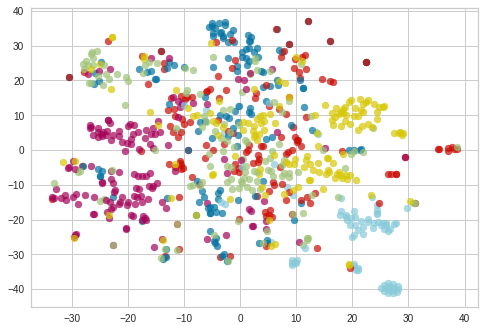

In [103]:
# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
X_tnse = tsne.fit(X_train_title_body_comments, y_train)

We can see that the generated clusters using the TFIDF-Vectorizer. The graph above shows that the clusters are overlapping with each other. In this case, the `Decision-Tree classifier` won't be able to provide much accuracy. 

Whereas, ensemble models like `Random Forest Classifer` can do better than `Decision-Tree Classifier` because it creates multiple decision trees and merges them together to obtain a more stable and accurate prediction. Also, it has the power to handle a large data set with higher dimensionality. 

### Train the model on the TFIDF trained features

**Train the models on the `title` feature**

1. Logistic Regression 

In [104]:
lr_classifier.fit(X_train_title, y_train)

y_predict_title_lr = lr_classifier.predict(X_test_title)

accuracy_title_lr, precision_title_lr, recall_title_lr, f1_title_lr = get_metrics(y_test, y_predict_title_lr)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_title_lr, precision_title_lr, recall_title_lr, f1_title_lr))

accuracy = 0.625, precision = 0.738, recall = 0.625, f1 = 0.663


2. Support Vector Machine (SVM)

In [105]:
svm_classifier.fit(X_train_title, y_train)

y_predict_title_svm = svm_classifier.predict(X_test_title)

accuracy_title_svm, precision_title_svm, recall_title_svm, f1_title_svm = get_metrics(y_test, y_predict_title_svm)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_title_svm, precision_title_svm, recall_title_svm, f1_title_svm))

accuracy = 0.679, precision = 0.754, recall = 0.679, f1 = 0.689


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Naive Bayes Classifier

In [106]:
nb_classifier.fit(X_train_title, y_train)

y_predict_title_nb = nb_classifier.predict(X_test_title)

accuracy_title_nb, precision_title_nb, recall_title_nb, f1_title_nb = get_metrics(y_test, y_predict_title_nb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_title_nb, precision_title_nb, recall_title_nb, f1_title_nb))

accuracy = 0.643, precision = 0.731, recall = 0.643, f1 = 0.648


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. Decision Tree Classifier

In [107]:
dt_classifier.fit(X_train_title, y_train)

y_predict_title_dt = dt_classifier.predict(X_test_title)

accuracy_title_dt, precision_title_dt, recall_title_dt, f1_title_dt = get_metrics(y_test, y_predict_title_dt)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_title_dt, precision_title_dt, recall_title_dt, f1_title_dt))

accuracy = 0.298, precision = 0.232, recall = 0.298, f1 = 0.236


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. Random Forest Classifier

In [108]:
random_forest_classifier.fit(X_train_title, y_train)

y_predict_title_rf = random_forest_classifier.predict(X_test_title)

accuracy_title_rf, precision_title_rf, recall_title_rf, f1_title_rf = get_metrics(y_test, y_predict_title_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_title_rf, precision_title_rf, recall_title_rf, f1_title_rf))

accuracy = 0.670, precision = 0.724, recall = 0.670, f1 = 0.676


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. XGBoost Classifier

In [109]:
xgboost_classifier.fit(X_train_title, y_train)

y_predict_title_xgb = xgboost_classifier.predict(X_test_title)

accuracy_title_xgb, precision_title_xgb, recall_title_xgb, f1_title_xgb = get_metrics(y_test, y_predict_title_xgb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_title_xgb, precision_title_xgb, recall_title_xgb, f1_title_xgb ))

accuracy = 0.667, precision = 0.734, recall = 0.667, f1 = 0.676


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Summary of the `title` features on various ML models**

In [110]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost Classifier'],
    'Score': [accuracy_title_lr, accuracy_title_svm, accuracy_title_nb, accuracy_title_dt, accuracy_title_rf, accuracy_title_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,SVM,0.678571
4,Random Forest,0.669643
5,XGBoost Classifier,0.666667
2,Naive Bayes,0.642857
0,Logistic Regression,0.625000
3,Decision Tree,0.297619


**Train the models on the `body` feature**

1. Logistic Regression 

In [111]:
lr_classifier.fit(X_train_body, y_train)

y_predict_body_lr = lr_classifier.predict(X_test_body)

accuracy_body_lr, precision_body_lr, recall_body_lr, f1_body_lr = get_metrics(y_test, y_predict_body_lr)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_body_lr, precision_body_lr, recall_body_lr, f1_body_lr))

accuracy = 0.390, precision = 0.467, recall = 0.390, f1 = 0.390


2. Support Vector Machine (SVM)

In [112]:
svm_classifier.fit(X_train_body, y_train)

y_predict_body_svm = svm_classifier.predict(X_test_body)

accuracy_body_svm, precision_body_svm, recall_body_svm, f1_body_svm = get_metrics(y_test, y_predict_body_svm)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_body_svm, precision_body_svm, recall_body_svm, f1_body_svm))

accuracy = 0.402, precision = 0.502, recall = 0.402, f1 = 0.404


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Naive Bayes Classifier

In [113]:
nb_classifier.fit(X_train_body, y_train)

y_predict_body_nb = nb_classifier.predict(X_test_body)

accuracy_body_nb, precision_body_nb, recall_body_nb, f1_body_nb = get_metrics(y_test, y_predict_body_nb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_body_nb, precision_body_nb, recall_body_nb, f1_body_nb))

accuracy = 0.315, precision = 0.518, recall = 0.315, f1 = 0.314


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. Decision Tree Classifier

In [114]:
dt_classifier.fit(X_train_body, y_train)

y_predict_body_dt = dt_classifier.predict(X_test_body)

accuracy_body_dt, precision_body_dt, recall_body_dt, f1_body_dt = get_metrics(y_test, y_predict_body_dt)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_body_dt, precision_body_dt, recall_body_dt, f1_body_dt))

accuracy = 0.188, precision = 0.295, recall = 0.188, f1 = 0.165


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. Random Forest Classifier

In [115]:
random_forest_classifier.fit(X_train_body, y_train)

y_predict_body_rf = random_forest_classifier.predict(X_test_body)

accuracy_body_rf, precision_body_rf, recall_body_rf, f1_body_rf = get_metrics(y_test, y_predict_body_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_body_rf, precision_body_rf, recall_body_rf, f1_body_rf))

accuracy = 0.464, precision = 0.585, recall = 0.464, f1 = 0.472


6. XGBoost Classifier

In [116]:
xgboost_classifier.fit(X_train_body, y_train)

y_predict_body_xgb = xgboost_classifier.predict(X_test_body)

accuracy_body_xgb, precision_body_xgb, recall_body_xgb, f1_body_xgb = get_metrics(y_test, y_predict_body_xgb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_body_xgb, precision_body_xgb, recall_body_xgb, f1_body_xgb))

accuracy = 0.432, precision = 0.559, recall = 0.432, f1 = 0.447


**Summary of the `body` features on various ML models**

In [117]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost Classifier'],
    'Score': [accuracy_body_lr, accuracy_body_svm, accuracy_body_nb, accuracy_body_dt, accuracy_body_rf, accuracy_body_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.464286
5,XGBoost Classifier,0.431548
1,SVM,0.401786
0,Logistic Regression,0.389881
2,Naive Bayes,0.315476
3,Decision Tree,0.187500


**Train the models with `comments` feature**



1. Logistic Regression 

In [118]:
lr_classifier.fit(X_train_comments, y_train)

y_predict_comments_lr = lr_classifier.predict(X_test_comments)

accuracy_comments_lr, precision_comments_lr, recall_comments_lr, f1_comments_lr = get_metrics(y_test, y_predict_comments_lr)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_comments_lr, precision_comments_lr, recall_comments_lr, f1_comments_lr))

accuracy = 0.494, precision = 0.526, recall = 0.494, f1 = 0.492


2. Support Vector Machine (SVM)

In [119]:
svm_classifier.fit(X_train_comments, y_train)

y_predict_comments_svm = svm_classifier.predict(X_test_comments)

accuracy_comments_svm, precision_comments_svm, recall_comments_svm, f1_comments_svm = get_metrics(y_test, y_predict_comments_svm)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_comments_svm, precision_comments_svm, recall_comments_svm, f1_comments_svm))

accuracy = 0.485, precision = 0.500, recall = 0.485, f1 = 0.476


3. Naive Bayes Classifier

In [120]:
nb_classifier.fit(X_train_comments, y_train)

y_predict_comments_nb = nb_classifier.predict(X_test_comments)

accuracy_comments_nb, precision_comments_nb, recall_comments_nb, f1_comments_nb = get_metrics(y_test, y_predict_comments_nb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_comments_nb, precision_comments_nb, recall_comments_nb, f1_comments_nb))

accuracy = 0.399, precision = 0.505, recall = 0.399, f1 = 0.380


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. Decision Tree Classifier

In [121]:
dt_classifier.fit(X_train_comments, y_train)

y_predict_comments_dt = dt_classifier.predict(X_test_comments)

accuracy_comments_dt, precision_comments_dt, recall_comments_dt, f1_comments_dt = get_metrics(y_test, y_predict_comments_dt)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_comments_dt, precision_comments_dt, recall_comments_dt, f1_comments_dt))

accuracy = 0.199, precision = 0.212, recall = 0.199, f1 = 0.165


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. Random Forest Classifier

In [122]:
random_forest_classifier.fit(X_train_comments, y_train)

y_predict_comments_rf = random_forest_classifier.predict(X_test_comments)

accuracy_comments_rf, precision_comments_rf, recall_comments_rf, f1_comments_rf = get_metrics(y_test, y_predict_comments_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_comments_rf, precision_comments_rf, recall_comments_rf, f1_comments_rf))

accuracy = 0.500, precision = 0.523, recall = 0.500, f1 = 0.495


6. XGBOost Classifier

In [123]:
xgboost_classifier.fit(X_train_comments, y_train)

y_predict_comments_xgb = xgboost_classifier.predict(X_test_comments)

accuracy_comments_xgb, precision_comments_xgb, recall_comments_xgb, f1_comments_xgb = get_metrics(y_test, y_predict_comments_xgb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_comments_xgb, precision_comments_xgb, recall_comments_xgb, f1_comments_xgb))

accuracy = 0.473, precision = 0.506, recall = 0.473, f1 = 0.478


**Summary of the `comments` features on various ML models**

In [124]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost Classifer'],
    'Score': [accuracy_comments_lr, accuracy_comments_svm, accuracy_comments_nb, accuracy_comments_dt, accuracy_comments_rf, accuracy_comments_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.500000
0,Logistic Regression,0.494048
1,SVM,0.485119
5,XGBoost Classifer,0.473214
2,Naive Bayes,0.398810
3,Decision Tree,0.199405


**Train the models with `title` + `body` feature**



1. Logistic Regression 

In [125]:
lr_classifier.fit(X_train_title_body, y_train)

y_predict_tb_lr = lr_classifier.predict(X_test_title_body)

accuracy_tb_lr, precision_tb_lr, recall_tb_lr, f1_tb_lr = get_metrics(y_test, y_predict_tb_lr)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tb_lr, precision_tb_lr, recall_tb_lr, f1_tb_lr))

accuracy = 0.732, precision = 0.738, recall = 0.732, f1 = 0.727


2. Support Vector Machine (SVM)

In [126]:
svm_classifier.fit(X_train_title_body, y_train)

y_predict_tb_svm = svm_classifier.predict(X_test_title_body)

accuracy_tb_svm, precision_tb_svm, recall_tb_svm, f1_tb_svm = get_metrics(y_test, y_predict_tb_svm)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tb_svm, precision_tb_svm, recall_tb_svm, f1_tb_svm))

accuracy = 0.735, precision = 0.734, recall = 0.735, f1 = 0.726


3. Naive Bayes Classifier

In [127]:
nb_classifier.fit(X_train_title_body, y_train)

y_predict_tb_nb = nb_classifier.predict(X_test_title_body)

accuracy_tb_nb, precision_tb_nb, recall_tb_nb, f1_tb_nb = get_metrics(y_test, y_predict_tb_nb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tb_nb, precision_tb_nb, recall_tb_nb, f1_tb_nb))

accuracy = 0.661, precision = 0.681, recall = 0.661, f1 = 0.655


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. Decision Tree Classifier

In [128]:
dt_classifier.fit(X_train_title_body, y_train)

y_predict_tb_dt = dt_classifier.predict(X_test_title_body)

accuracy_tb_dt, precision_tb_dt, recall_tb_dt, f1_tb_dt = get_metrics(y_test, y_predict_tb_dt)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tb_dt, precision_tb_dt, recall_tb_dt, f1_tb_dt))

accuracy = 0.304, precision = 0.259, recall = 0.304, f1 = 0.249


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. Random Forest Classifier

In [129]:
random_forest_classifier.fit(X_train_title_body, y_train)

y_predict_tb_rf = random_forest_classifier.predict(X_test_title_body)

accuracy_tb_rf, precision_tb_rf, recall_tb_rf, f1_tb_rf = get_metrics(y_test, y_predict_tb_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tb_rf, precision_tb_rf, recall_tb_rf, f1_tb_rf))

accuracy = 0.789, precision = 0.813, recall = 0.789, f1 = 0.792


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. XGBoost Classifier

In [157]:
xgboost_classifier.fit(X_train_title_body, y_train)

y_predict_tb_xgb = xgboost_classifier.predict(X_test_title_body)

accuracy_tb_xgb, precision_tb_xgb, recall_tb_xgb, f1_tb_xgb = get_metrics(y_test, y_predict_tb_xgb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tb_xgb, precision_tb_xgb, recall_tb_xgb, f1_tb_xgb))

accuracy = 0.798, precision = 0.829, recall = 0.798, f1 = 0.805


**Summary of the `title` + `body` features on various ML models**

In [158]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost Classifier'],
    'Score': [accuracy_tb_lr, accuracy_tb_svm, accuracy_tb_nb, accuracy_tb_dt, accuracy_tb_rf, accuracy_tb_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,XGBoost Classifier,0.797619
4,Random Forest,0.788690
1,SVM,0.735119
0,Logistic Regression,0.732143
2,Naive Bayes,0.660714
3,Decision Tree,0.303571


**Train the models with `body` + `comments` feature**



1. Logistic Regression 

In [132]:
lr_classifier.fit(X_train_body_comments, y_train)

y_predict_bc_lr = lr_classifier.predict(X_test_body_comments)

accuracy_bc_lr, precision_bc_lr, recall_bc_lr, f1_bc_lr = get_metrics(y_test, y_predict_bc_lr)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_bc_lr, precision_bc_lr, recall_bc_lr, f1_bc_lr))

accuracy = 0.577, precision = 0.580, recall = 0.577, f1 = 0.569


2. Support Vector Machine (SVM)

In [133]:
svm_classifier.fit(X_train_body_comments, y_train)

y_predict_bc_svm = svm_classifier.predict(X_test_body_comments)

accuracy_bc_svm, precision_bc_svm, recall_bc_svm, f1_bc_svm = get_metrics(y_test, y_predict_bc_svm)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_bc_svm, precision_bc_svm, recall_bc_svm, f1_bc_svm))

accuracy = 0.580, precision = 0.580, recall = 0.580, f1 = 0.566


3. Naive Bayes Classifier

In [134]:
nb_classifier.fit(X_train_body_comments, y_train)

y_predict_bc_nb = nb_classifier.predict(X_test_body_comments)

accuracy_bc_nb, precision_bc_nb, recall_bc_nb, f1_bc_nb = get_metrics(y_test, y_predict_bc_nb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_bc_nb, precision_bc_nb, recall_bc_nb, f1_bc_nb))

accuracy = 0.443, precision = 0.543, recall = 0.443, f1 = 0.425


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. Decision Tree Classifier

In [135]:
dt_classifier.fit(X_train_body_comments, y_train)

y_predict_bc_dt = dt_classifier.predict(X_test_body_comments)

accuracy_bc_dt, precision_bc_dt, recall_bc_dt, f1_bc_dt = get_metrics(y_test, y_predict_bc_dt)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_bc_dt, precision_bc_dt, recall_bc_dt, f1_bc_dt))

accuracy = 0.256, precision = 0.222, recall = 0.256, f1 = 0.204


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. Random Forest Classifier

In [136]:
random_forest_classifier.fit(X_train_body_comments, y_train)

y_predict_bc_rf = random_forest_classifier.predict(X_test_body_comments)

accuracy_bc_rf, precision_bc_rf, recall_bc_rf, f1_bc_rf = get_metrics(y_test, y_predict_bc_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_bc_rf, precision_bc_rf, recall_bc_rf, f1_bc_rf))

accuracy = 0.637, precision = 0.664, recall = 0.637, f1 = 0.629


6. XGBoost Classifier

In [159]:
xgboost_classifier.fit(X_train_body_comments, y_train)

y_predict_bc_xgb = xgboost_classifier.predict(X_test_body_comments)

accuracy_bc_xgb, precision_bc_xgb, recall_bc_xgb, f1_bc_xgb = get_metrics(y_test, y_predict_bc_xgb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_bc_xgb, precision_bc_xgb, recall_bc_xgb, f1_bc_xgb))

accuracy = 0.631, precision = 0.650, recall = 0.631, f1 = 0.628


**Summary of the `body` +  `comments` features on various ML models**

In [160]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost Classifier'],
    'Score': [accuracy_bc_lr, accuracy_bc_svm, accuracy_bc_nb, accuracy_bc_dt, accuracy_bc_rf, accuracy_bc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.636905
5,XGBoost Classifier,0.630952
1,SVM,0.580357
0,Logistic Regression,0.577381
2,Naive Bayes,0.443452
3,Decision Tree,0.255952


**Train the models with `title` +  `comments` feature**



1. Logistic Regression 

In [139]:
lr_classifier.fit(X_train_title_comments, y_train)

y_predict_tc_lr = lr_classifier.predict(X_test_title_comments)

accuracy_tc_lr, precision_tc_lr, recall_tc_lr, f1_tc_lr = get_metrics(y_test, y_predict_tc_lr)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tc_lr, precision_tc_lr, recall_tc_lr, f1_tc_lr))

accuracy = 0.658, precision = 0.678, recall = 0.658, f1 = 0.659


2. Support Vector Machine (SVM)

In [140]:
svm_classifier.fit(X_train_title_comments, y_train)

y_predict_tc_svm = svm_classifier.predict(X_test_title_comments)

accuracy_tc_svm, precision_tc_svm, recall_tc_svm, f1_tc_svm = get_metrics(y_test, y_predict_tc_svm)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tc_svm, precision_tc_svm, recall_tc_svm, f1_tc_svm))

accuracy = 0.652, precision = 0.656, recall = 0.652, f1 = 0.646


3. Naive Bayes Classifier

In [141]:
nb_classifier.fit(X_train_title_comments, y_train)

y_predict_tc_nb = nb_classifier.predict(X_test_title_comments)

accuracy_tc_nb, precision_tc_nb, recall_tc_nb, f1_tc_nb = get_metrics(y_test, y_predict_tc_nb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tc_nb, precision_tc_nb, recall_tc_nb, f1_tc_nb))

accuracy = 0.562, precision = 0.669, recall = 0.562, f1 = 0.556


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. Decision Tree Classifier

In [142]:
dt_classifier.fit(X_train_title_comments, y_train)

y_predict_tc_dt = dt_classifier.predict(X_test_title_comments)

accuracy_tc_dt, precision_tc_dt, recall_tc_dt, f1_tc_dt = get_metrics(y_test, y_predict_tc_dt)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tc_dt, precision_tc_dt, recall_tc_dt, f1_tc_dt))

accuracy = 0.312, precision = 0.307, recall = 0.312, f1 = 0.246


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. Random Forest Classifier

In [143]:
random_forest_classifier.fit(X_train_title_comments, y_train)

y_predict_tc_rf = random_forest_classifier.predict(X_test_title_comments)

accuracy_tc_rf, precision_tc_rf, recall_tc_rf, f1_tc_rf = get_metrics(y_test, y_predict_tc_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tc_rf, precision_tc_rf, recall_tc_rf, f1_tc_rf))

accuracy = 0.741, precision = 0.757, recall = 0.741, f1 = 0.741


6. XGBoost Classifier

In [161]:
xgboost_classifier.fit(X_train_title_comments, y_train)

y_predict_tc_xgb = xgboost_classifier.predict(X_test_title_comments)

accuracy_tc_xgb, precision_tc_xgb, recall_tc_xgb, f1_tc_xgb = get_metrics(y_test, y_predict_tc_xgb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tc_xgb, precision_tc_xgb, recall_tc_xgb, f1_tc_xgb))

accuracy = 0.741, precision = 0.750, recall = 0.741, f1 = 0.741


**Summary of the `title` +  `comments` features on various ML models**


In [162]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest','XGBoost Classifier'],
    'Score': [accuracy_tc_lr, accuracy_tc_svm, accuracy_tc_nb, accuracy_tc_dt, accuracy_tc_rf, accuracy_tc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.741071
5,XGBoost Classifier,0.741071
0,Logistic Regression,0.657738
1,SVM,0.651786
2,Naive Bayes,0.562500
3,Decision Tree,0.312500


**Train the models with `title` + `body` + `comments` feature**



1. Logistic Regression 

In [146]:
lr_classifier.fit(X_train_title_body_comments, y_train)

y_predict_tbc_lr = lr_classifier.predict(X_test_title_body_comments)

accuracy_tbc_lr, precision_tbc_lr, recall_tbc_lr, f1_tbc_lr = get_metrics(y_test, y_predict_tbc_lr)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tbc_lr, precision_tbc_lr, recall_tbc_lr, f1_tbc_lr))

accuracy = 0.693, precision = 0.699, recall = 0.693, f1 = 0.692


2. Support Vector Machine (SVM)

In [147]:
svm_classifier.fit(X_train_title_body_comments, y_train)

y_predict_tbc_svm = svm_classifier.predict(X_test_title_body_comments)

accuracy_tbc_svm, precision_tbc_svm, recall_tbc_svm, f1_tbc_svm = get_metrics(y_test, y_predict_tbc_svm)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tbc_svm, precision_tbc_svm, recall_tbc_svm, f1_tbc_svm))

accuracy = 0.711, precision = 0.718, recall = 0.711, f1 = 0.707


3. Naive Bayes Classifier

In [148]:
nb_classifier.fit(X_train_title_body_comments, y_train)

y_predict_tbc_nb = nb_classifier.predict(X_test_title_body_comments)

accuracy_tbc_nb, precision_tbc_nb, recall_tbc_nb, f1_tbc_nb = get_metrics(y_test, y_predict_tbc_nb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tbc_nb, precision_tbc_nb, recall_tbc_nb, f1_tbc_nb))

accuracy = 0.568, precision = 0.677, recall = 0.568, f1 = 0.558


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. Decision Tree Classifier

In [149]:
dt_classifier.fit(X_train_title_body_comments, y_train)

y_predict_tbc_dt = dt_classifier.predict(X_test_title_body_comments)

accuracy_tbc_dt, precision_tbc_dt, recall_tbc_dt, f1_tbc_dt = get_metrics(y_test, y_predict_tbc_dt)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tbc_dt, precision_tbc_dt, recall_tbc_dt, f1_tbc_dt))

accuracy = 0.315, precision = 0.340, recall = 0.315, f1 = 0.253


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5. Random Forest Classifier

In [150]:
random_forest_classifier.fit(X_train_title_body_comments, y_train)

y_predict_tbc_rf = random_forest_classifier.predict(X_test_title_body_comments)

accuracy_tbc_rf, precision_tbc_rf, recall_tbc_rf, f1_tbc_rf = get_metrics(y_test, y_predict_tbc_rf)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tbc_rf, precision_tbc_rf, recall_tbc_rf, f1_tbc_rf))

accuracy = 0.830, precision = 0.841, recall = 0.830, f1 = 0.830


In [163]:
xgboost_classifier.fit(X_train_title_body_comments, y_train)

y_predict_tbc_xgb = xgboost_classifier.predict(X_test_title_body_comments)

accuracy_tbc_xgb, precision_tbc_xgb, recall_tbc_xgb, f1_tbc_xgb = get_metrics(y_test, y_predict_tbc_xgb)

print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tbc_xgb, precision_tbc_xgb, recall_tbc_xgb, f1_tbc_xgb))

accuracy = 0.866, precision = 0.870, recall = 0.866, f1 = 0.866


**Summary of the `title` + `body` +  `comments` features on various ML models**

In [164]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost Classifier'],
    'Score': [accuracy_tbc_lr, accuracy_tbc_svm, accuracy_tbc_nb, accuracy_tbc_dt, accuracy_tbc_rf, accuracy_tbc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,XGBoost Classifier,0.866071
4,Random Forest,0.830357
1,SVM,0.711310
0,Logistic Regression,0.693452
2,Naive Bayes,0.568452
3,Decision Tree,0.315476


It has observed that the XGBoost Classifier gives the highest accuracy of 86% using (title + body + comment) as the features when trained on TFIDF vectorizer. 

Also, using reddit post `body` as the only feature gave the worst accuracies on all classifiers. 

Thus, a combination of features was used to predict the flair correctly.

**Conclusion:**

`TFIDF` features gives better accuracy than `CountVectorizer` features. 


**Save the model and the TFIDF variable**

In [0]:
import pickle

In [0]:
with open('model.pkl', 'wb') as file:
  pickle.dump(xgboost_classifier, file) #save the trained Random Forest Classifier

!cp model.pkl /content/drive/My\ Drive/Reddit\ Flare\ Detector # Copy the model in the Google Drive Folder 

In [0]:
with open('tfidf_variable.pkl', 'wb') as file:
  pickle.dump(tfidf_title_body_comments, file) #save the TFIDF variable
  
!cp tfidf_variable.pkl /content/drive/My\ Drive/Reddit\ Flare\ Detector # Copy the model in the Google Drive Folder